In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### The idea:
1. I would like to measure how well are my models predicting and can I really use these models to trade.
2. The idea here would be to compare the predicted price from tomorrow to the actual price.
3. Then go long(+1) if the model predicts higher or go short(-1) if the model predicts lower.
4. Then calculate the daily return which would be % change * my position.
5. Then accumulate the results and compute the sharpe ratio.

#### 🔹 Step 1 — Real Daily Return
$$
r_t = \dfrac{P_{t+1} - P_t}{P_t}
$$
#### 🔹 Step 2 — Trading Signal
$$
signal_t = sign(pred_{t+1} − actual_t)
$$
#### 🔹 Step 3 — Strategy Return
$$
strategy return_t = signal_t * r_t
$$
#### 🔹 Step 4 — Cumulative Growth
$$
Cumulative = Π_t (1 + strategy_return_t) − 1
$$
#### 🔹 Step 5 — Sharpe Ratio
$$
Sharpe = mean(strategy return_t) / std(strategy return_t) * sqrt(252)
$$

In [16]:
actual = np.array([100, 102, 101, 103])
pred   = np.array([101, 103, 102, 104])

# How do I compute real daily return:
returns = (actual[1:] - actual[:-1]) / actual[:-1]
print(returns)

# How do I decide when to go long an short:
signal = np.sign(pred[1:] - actual[:-1])
print(signal)

# How do I compute my strategy return each day:
strategy_return = signal * returns
print(strategy_return)

# How do I get cumulative growth:
cumulative_growth = np.cumprod(1 + strategy_return) - 1
print(cumulative_growth)

# How do I get the Sharpe Ratio:
sharpe_ratio = np.mean(strategy_return) / np.mean(strategy_return) * np.sqrt(252)
print(f"{sharpe_ratio: .3f}")

[ 0.02       -0.00980392  0.01980198]
[1 0 1]
[ 0.02       -0.          0.01980198]
[0.02       0.02       0.04019802]
 15.875


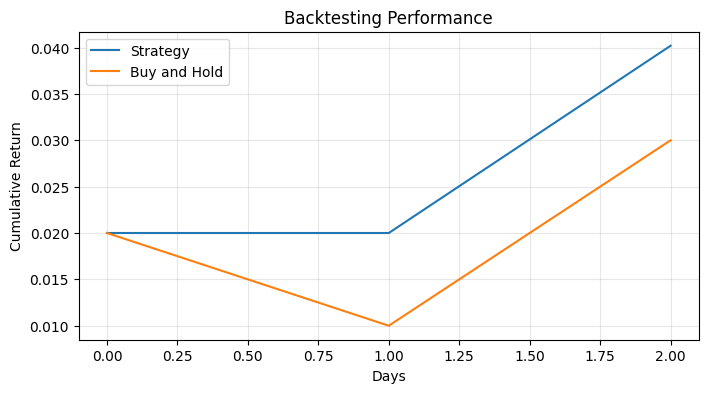

In [13]:
plt.figure(figsize=(8,4))
plt.plot(cumulative_growth, label="Strategy")
plt.plot(np.cumprod(1 + returns) - 1, label="Buy and Hold")
plt.legend()
plt.title("Backtesting Performance")
plt.xlabel("Days")
plt.ylabel("Cumulative Return")
plt.grid(True, alpha=0.3)
plt.show()

# 🧠 Quant Backtesting Practice Notebook — Weekend Sprint

These exercises will help you deeply understand how trading simulations, returns, and compounding work before adding them into your real ML stock dashboard.

---

## 🧩 **Goal**
Build intuition for:
- Daily returns
- Strategy signals (+1 long, –1 short)
- Compounded cumulative returns
- Trading costs and thresholds
- Performance metrics and visualizations

---

[0.02       0.01960784 0.01923077 0.01886792]
[-0.02       -0.02040816 -0.02083333 -0.0212766 ]


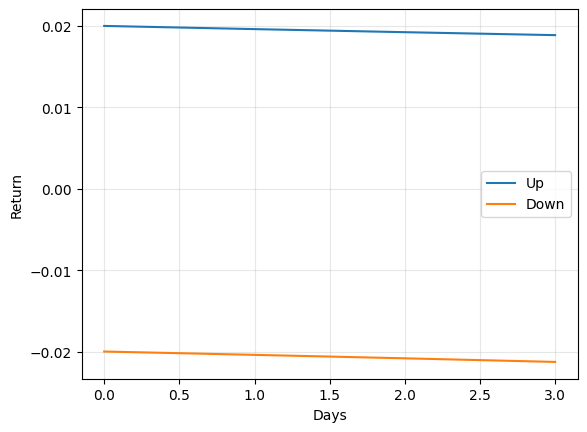

In [9]:
actual_up = np.array([100, 102, 104, 106, 108])
actual_down = np.array([100, 98, 96, 94, 92])
actual_vol = np.array([100, 102, 99, 103, 101])

returns_up = (actual_up[1:] - actual_up[:-1]) / actual_up[:-1]
returns_down = (actual_down[1:] - actual_down[:-1]) / actual_down[:-1]
print(returns_up)
print(returns_down)

plt.plot(returns_up, label="Up")
plt.plot(returns_down, label="Down")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Return")
plt.grid(True, alpha=0.3)
plt.show()

[100.03982638 102.21100288  99.22315889 102.42649568 101.32631972]
Signals: [ 1. -1.  1. -1.]
Returns: [ 0.02       -0.02941176  0.04040404 -0.01941748]
Strategy: [0.02       0.02941176 0.04040404 0.01941748]
Cumulative: [0.02       0.05       0.09242424 0.11363636]


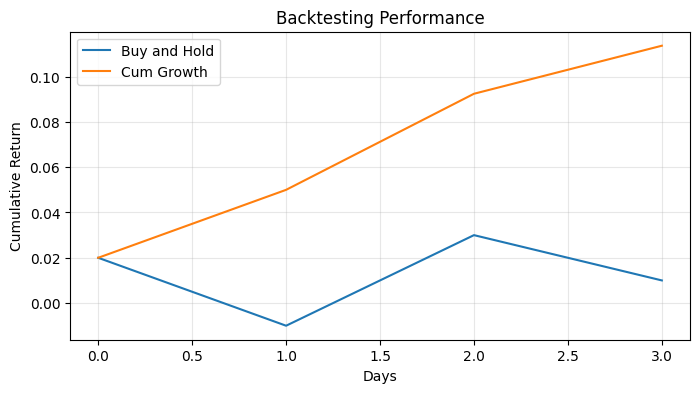

In [34]:
predictions = actual_vol * (1 +  np.random.normal(0, 0.002, size=len(actual_vol)))
print(predictions)

sig = np.sign(predictions[1:] - actual_vol[:-1])
rets = (actual_vol[1:] - actual_vol[:-1]) / actual_vol[:-1]
strategy_re = sig * rets
cum_growth = np.cumprod(1 + strategy_re) - 1

print("Signals:", sig)
print("Returns:", rets)
print("Strategy:", strategy_re)
print("Cumulative:", cum_growth)

plt.figure(figsize=(8,4))
plt.plot(np.cumprod(1 + rets) - 1, label="Buy and Hold")
plt.plot(cum_growth, label="Cum Growth")
plt.xlabel("Days")
plt.ylabel("Cumulative Return")
plt.legend()
plt.title("Backtesting Performance")
plt.grid(True, alpha=0.3)
plt.show()

# 📈 Quant Backtesting — Round 2 Practice

Now that you understand returns and compounding, these tasks make your backtest realistic and analytical.

---

## 🧩 Task 1 — Add Transaction Costs

### Goal
Model the penalty each time your trading signal flips (buy → sell or sell → buy).

### Steps
```python
flips = np.abs(np.diff(signal))       # 0 = no change, 2 = flip
cost_per_trade = 0.001                # 0.1% per trade
costs = (flips > 0).astype(float) * cost_per_trade
# Align arrays
costs = np.concatenate([[0], costs])  # same length as returns

strategy_return_net = strategy_return - costs
cum_growth_net = np.cumprod(1 + strategy_return_net) - 1

[2. 2. 2.]
[0.    0.001 0.001 0.001]
[0.02       0.02841176 0.03940404 0.01841748]
[0.02       0.04898    0.09031405 0.11039488]


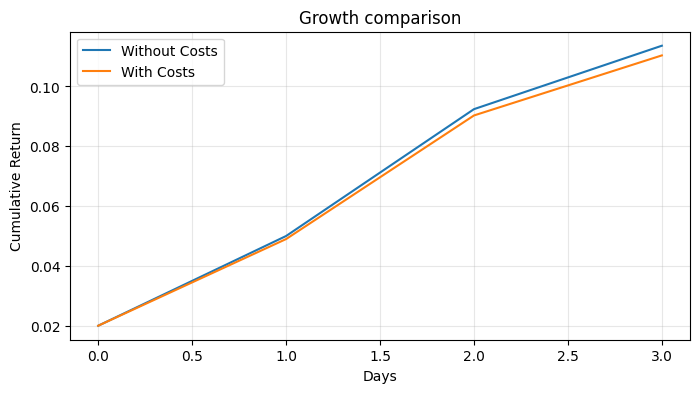

In [35]:
flips = np.abs(np.diff(sig))
cost_per_trade = 0.001
costs = (flips > 0).astype('float') * cost_per_trade
costs = np.concatenate([[0], costs])

strategy_return_net = strategy_re - costs
cum_growth_net = np.cumprod(strategy_return_net + 1) - 1

print(flips)
print(costs)
print(strategy_return_net)
print(cum_growth_net)

plt.figure(figsize=(8,4))
plt.plot(cum_growth, label='Without Costs')
plt.plot(cum_growth_net, label='With Costs')
plt.legend()
plt.title("Growth comparison")
plt.xlabel("Days")
plt.ylabel("Cumulative Return")
plt.grid(True, alpha=0.3)
plt.show()

⚙️ Task 2 — Add a "No-Trade Zone" (Threshold Rule)
Goal

Trade only when the model is confident enough.

In [36]:
threshold = 0.5
sig2 = np.where(np.abs(predictions[1:] - actual_vol[:-1]) > threshold,
                np.sign(predictions[1:] - actual_vol[:-1]), 0)

# Use actual returns
rets2 = (actual_vol[1:] - actual_vol[:-1]) / actual_vol[:-1]

strategy_re2 = sig2 * rets2
cum_growth2 = np.cumprod(1 + strategy_re2) - 1
sharpe_ratio2 = np.mean(strategy_re2) / np.std(strategy_re2) * np.sqrt(252)

print(f"Sharpe Ratio: {sharpe_ratio2:.2f}")
print("Strategy returns:", strategy_re2)
print("Cumulative growth:", cum_growth2)

Sharpe Ratio: 50.77
Strategy returns: [0.02       0.02941176 0.04040404 0.01941748]
Cumulative growth: [0.02       0.05       0.09242424 0.11363636]


Threshold = 0, Sharpe = 8.12
Threshold = 0.1, Sharpe = 8.59
Threshold = 0.3, Sharpe = 9.12
Threshold = 0.5, Sharpe = 10.26
Threshold = 1.0, Sharpe = 10.42


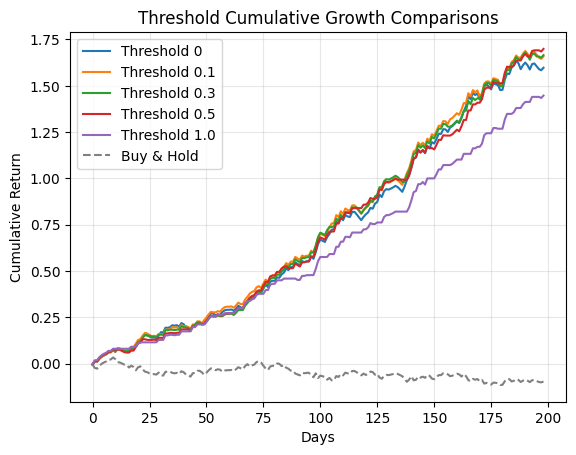

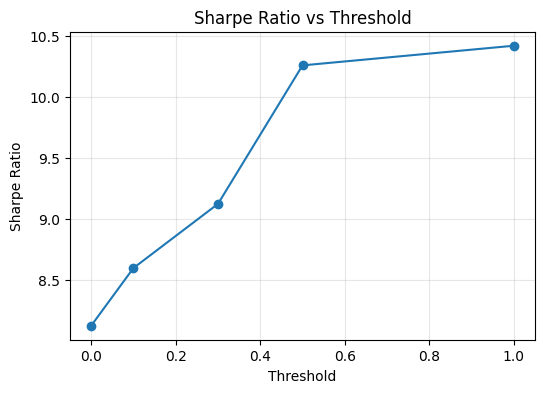

In [38]:
sharpe_scores = []
thresholds = [0, 0.1, 0.3, 0.5, 1.0]
actual_vol2 = 100 + np.cumsum(np.random.normal(0, 1, 200))
predictions2 = actual_vol2 + (1 + np.random.normal(0, 0.3, 200))

for th in thresholds:
    # Generate threshold-based signal
    sig3 = np.where(np.abs(predictions2[1:] - actual_vol2[:-1]) > th,
                    np.sign(predictions2[1:] - actual_vol2[:-1]), 0)

    # Use actual market returns
    rets3 = (actual_vol2[1:] - actual_vol2[:-1]) / actual_vol2[:-1]

    # Apply strategy
    strategy_re3 = sig3 * rets3
    cum_growth3 = np.cumprod(1 + strategy_re3) - 1

    # Compute Sharpe
    if np.std(strategy_re3) > 0:
        sharpe_ratio3 = np.mean(strategy_re3) / np.std(strategy_re3) * np.sqrt(252)
    else:
        sharpe_ratio3 = 0
    sharpe_scores.append(sharpe_ratio3)

    # Print results
    print(f"Threshold = {th}, Sharpe = {sharpe_ratio3:.2f}")

    # Plot cumulative performance
    plt.plot(cum_growth3, label=f"Threshold {th}")

# Add buy-and-hold baseline
plt.plot(np.cumprod(1 + rets3) - 1, linestyle='--', color='gray', label="Buy & Hold")
plt.legend()
plt.title("Threshold Cumulative Growth Comparisons")
plt.xlabel("Days")
plt.ylabel("Cumulative Return")
plt.grid(True, alpha=0.3)
plt.show()

# Plot Sharpe vs threshold
plt.figure(figsize=(6,4))
plt.plot(thresholds, sharpe_scores, marker='o')
plt.title("Sharpe Ratio vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Sharpe Ratio")
plt.grid(True, alpha=0.3)
plt.show()